# Comprehensive Vertex AI Tutorial For Beginners

## Introduction

Even though most people associate search engines with Google, the company has deep roots in the data science industry. It consistently delivers state-of-the-art products and solutions aimed at getting the most benefit from data. One of their products, Vertex AI, was released in 2021 to simplify the machine learning process at enterprise scale.

In this tutorial, we will learn how to get started with Google's Vertex AI platform and how to use it to cover a wider range of tasks of the ML life cycle. We will leave with a deployed model we can send requests to generate predictions for a classification task. 

## What is Vertex AI?

A typical machine learning life cycle consists of many stages:

- Data preparation, ingestion, exploration
- Feature engineering, selection
- Model training and tuning
- Deploying and model monitoring

All these stages and sub-stages require different set of tools and diverse team of experts to coordinate them. Vertex AI by Google Cloud streamlines and unifies this entire process into a single platform.

While large-scale ML applications require seasoned specialists, Vertex AI empowers users of any skill level:
- __AutoML for beginners__: Requires no coding experience! Simply feed your data and with a few clicks, AutoML generates a high quality model for you. All the heavy lifting of data preparation, model building including algorithm selection and hyperparameter tuning is performed under the hood.
- __Custom model training for experts__: Your experience is the limit. For experienced data scientists and ML engineers, Vertex AI provides the flexibility to train models using their preferred framework such as PyTorch, TensorFlow or XGBoost.
- __Deployment for everyone__: Once you have a model trained by either AutoML or a custom one, Vertex AI makes deploying them a breeze. You can publish models as real-time APIs to integrate into your products or use batch-prediction for large-scale tasks.

There are many things we aren't mentioning in this section, as you will get to work on most of them yourself in this tutorial. 

## What are Google Cloud Services?

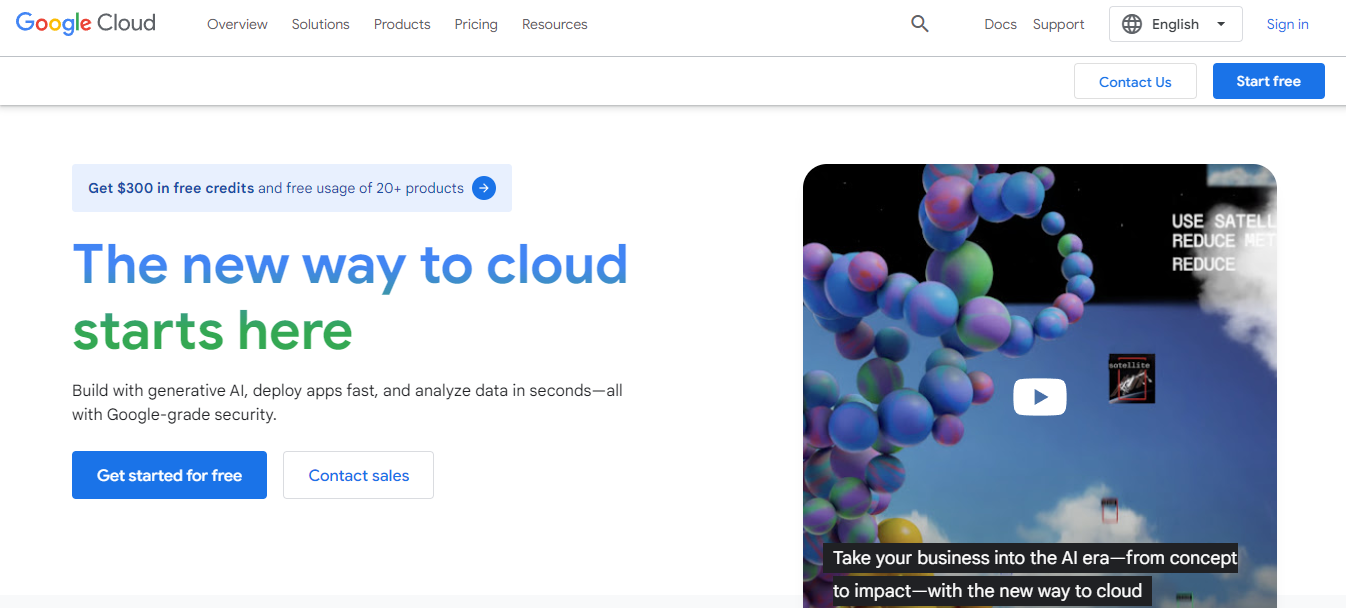

Before we start exploring the platform, we need to mention its parent - Google Cloud services. Google Cloud Services includes a wide range of cloud computing solutions that provide storage, networking, databases, analytics, and machine learning capabilities. These services work together in sync with Vertex AI to unify your machine learning workflow. Here's a breakdown of the services often used with Vertex AI:

__Data storage and management__
- __Cloud storage__: Acts as the central repository for your raw data, accessible by Vertex AI for training and analysis.
- __BigQuery__: A powerful data warehouse for storing and querying large datasets, enabling Vertex AI to use BigQuery ML for in-suit training.

__Compute Resources__:

- __Compute Engine__: Provides virtual machines with various configurations for your custom model training needs. Vertex AI can hook up to these machines for resource-intensive training tasks.
- __Vertex AI Pipelines__: Coordinates complex ML workflows across various compute resources for efficiency. 


Google Cloud services are always available from your Google Account if you visit cloud.google.com. If you have never used them before, click "Get started for free" to earn your free trail. Otherwise, you can directly go to console.cloud.google.com so that we can get started.

## Setting up your Google Cloud Console For Vertex AI

When you visit your Google Cloud Console, you will most likely end up on the following welcome page:

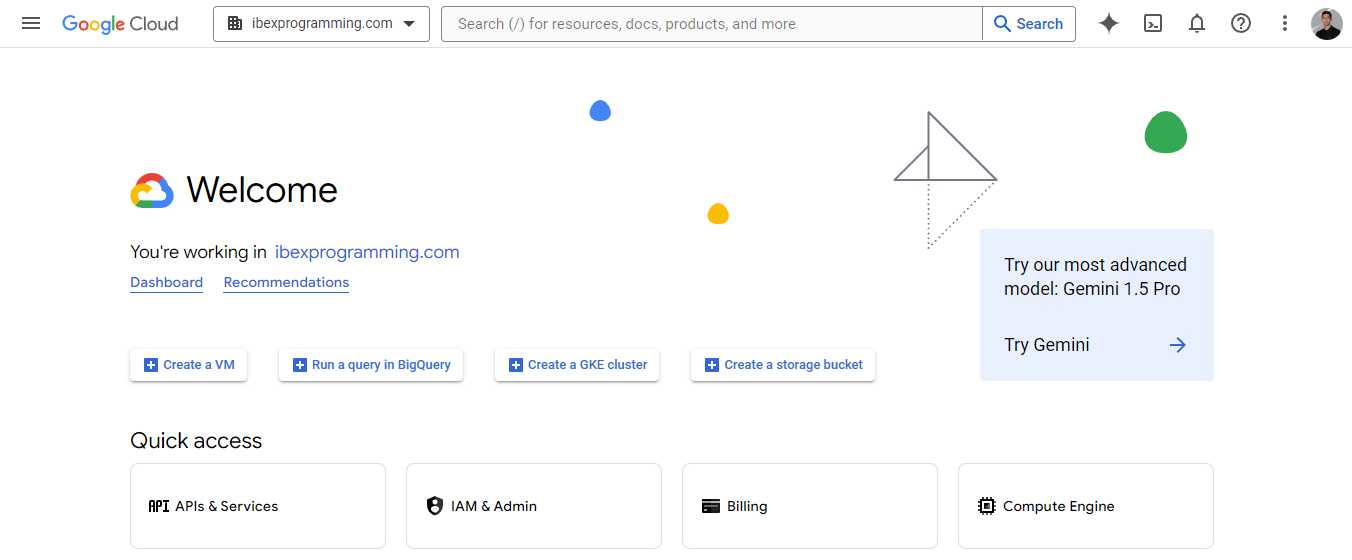

It lists your workspace name, mine is `ibexprogramming.com`. 

The first thing we will do is to create a project. Google Cloud projects are high-level organization units to manage resources for a specific problem. Here is a GIF on how to create one:

![](images/create_project.gif)

Once you are notified that the project has been created, select it so that the top bar of the page shows this:

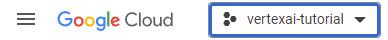

Now, you need to create a billing account because Vertex AI requires billing information to enable you its services. Don't worry - you won't be charged until you use paid resources. So, head over to https://console.cloud.google.com/billing:

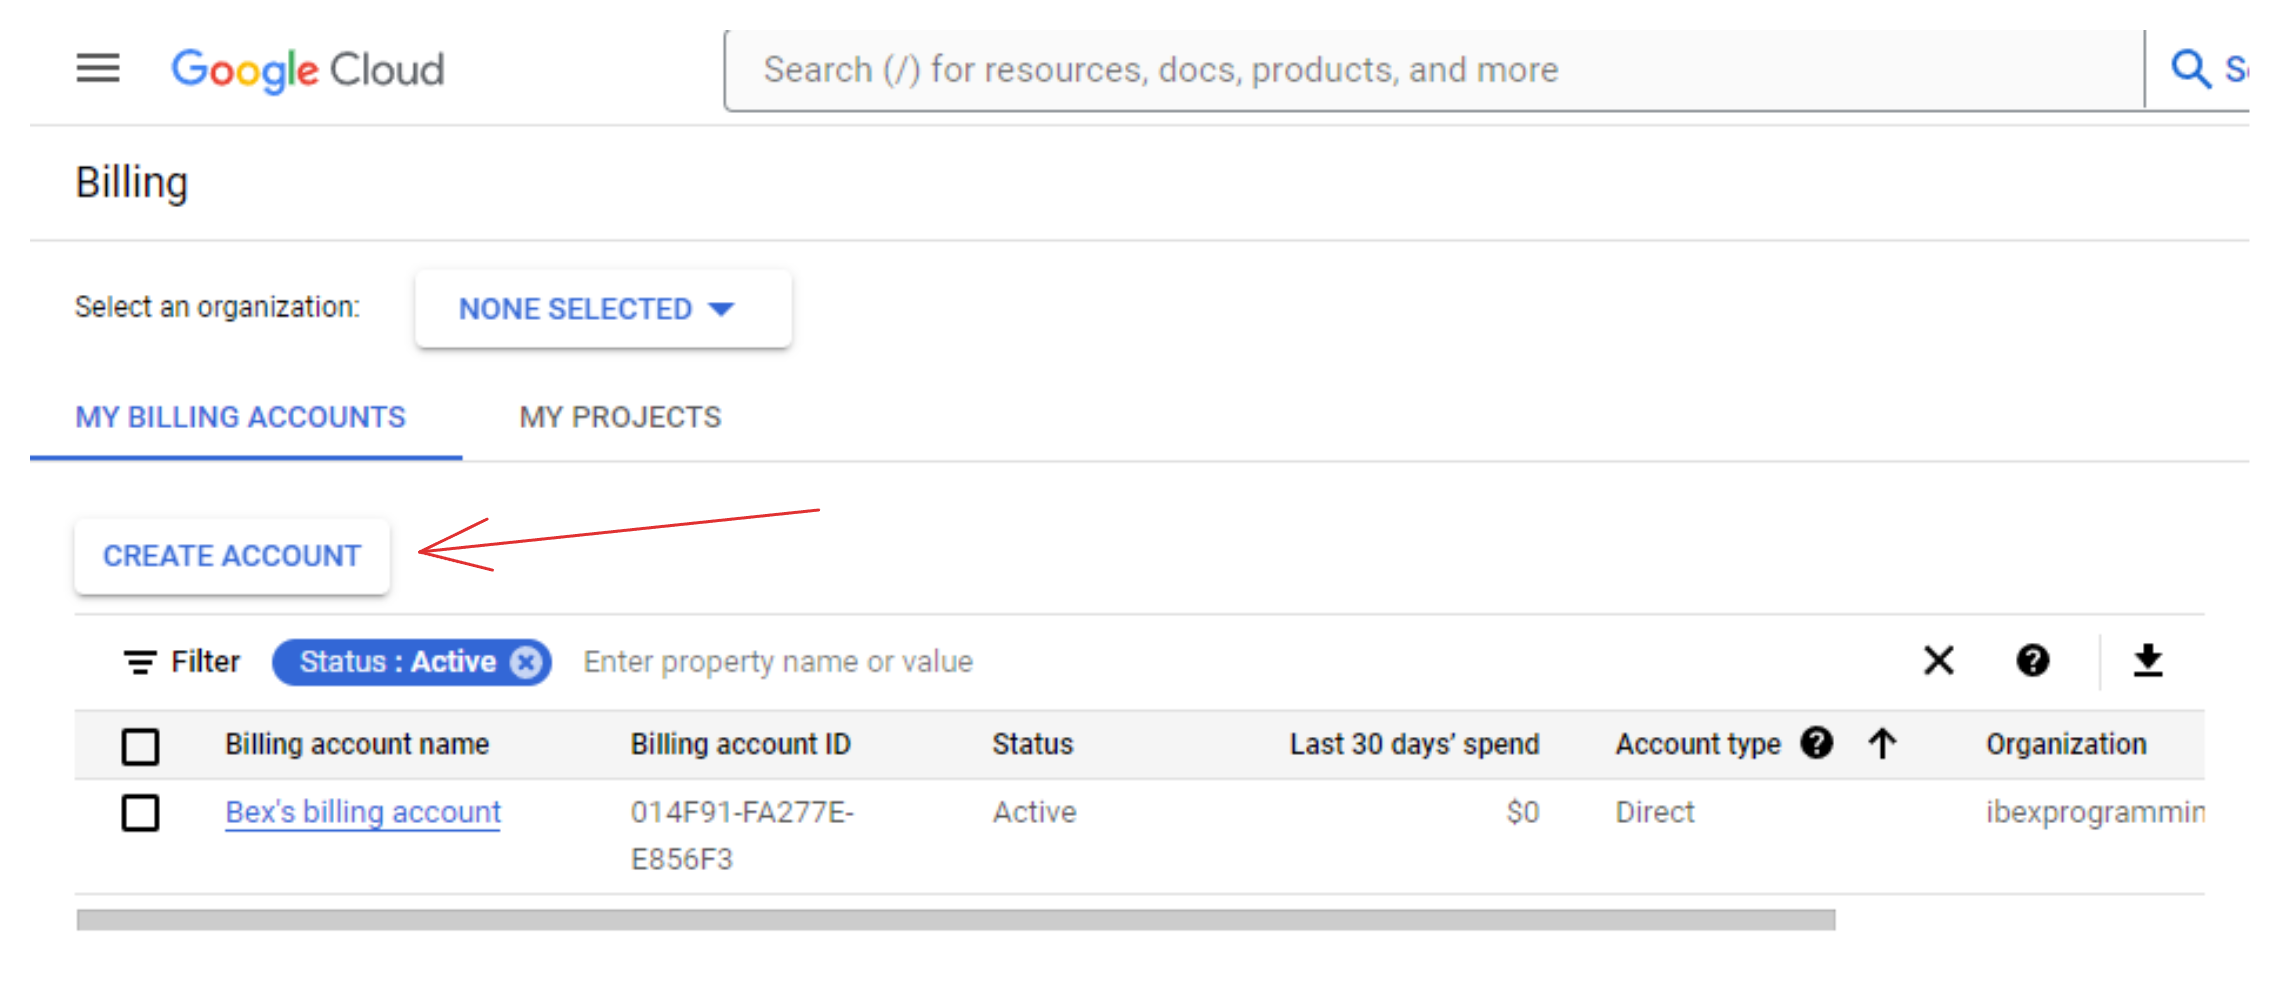

If you don't already have an account like mine, click on "Create account" and follow the instructions shown. We will link this billing account to our in the next section.

Afterward, go back to https://console.cloud.google.com/ and click on "View all products" button at the bottom of the page:

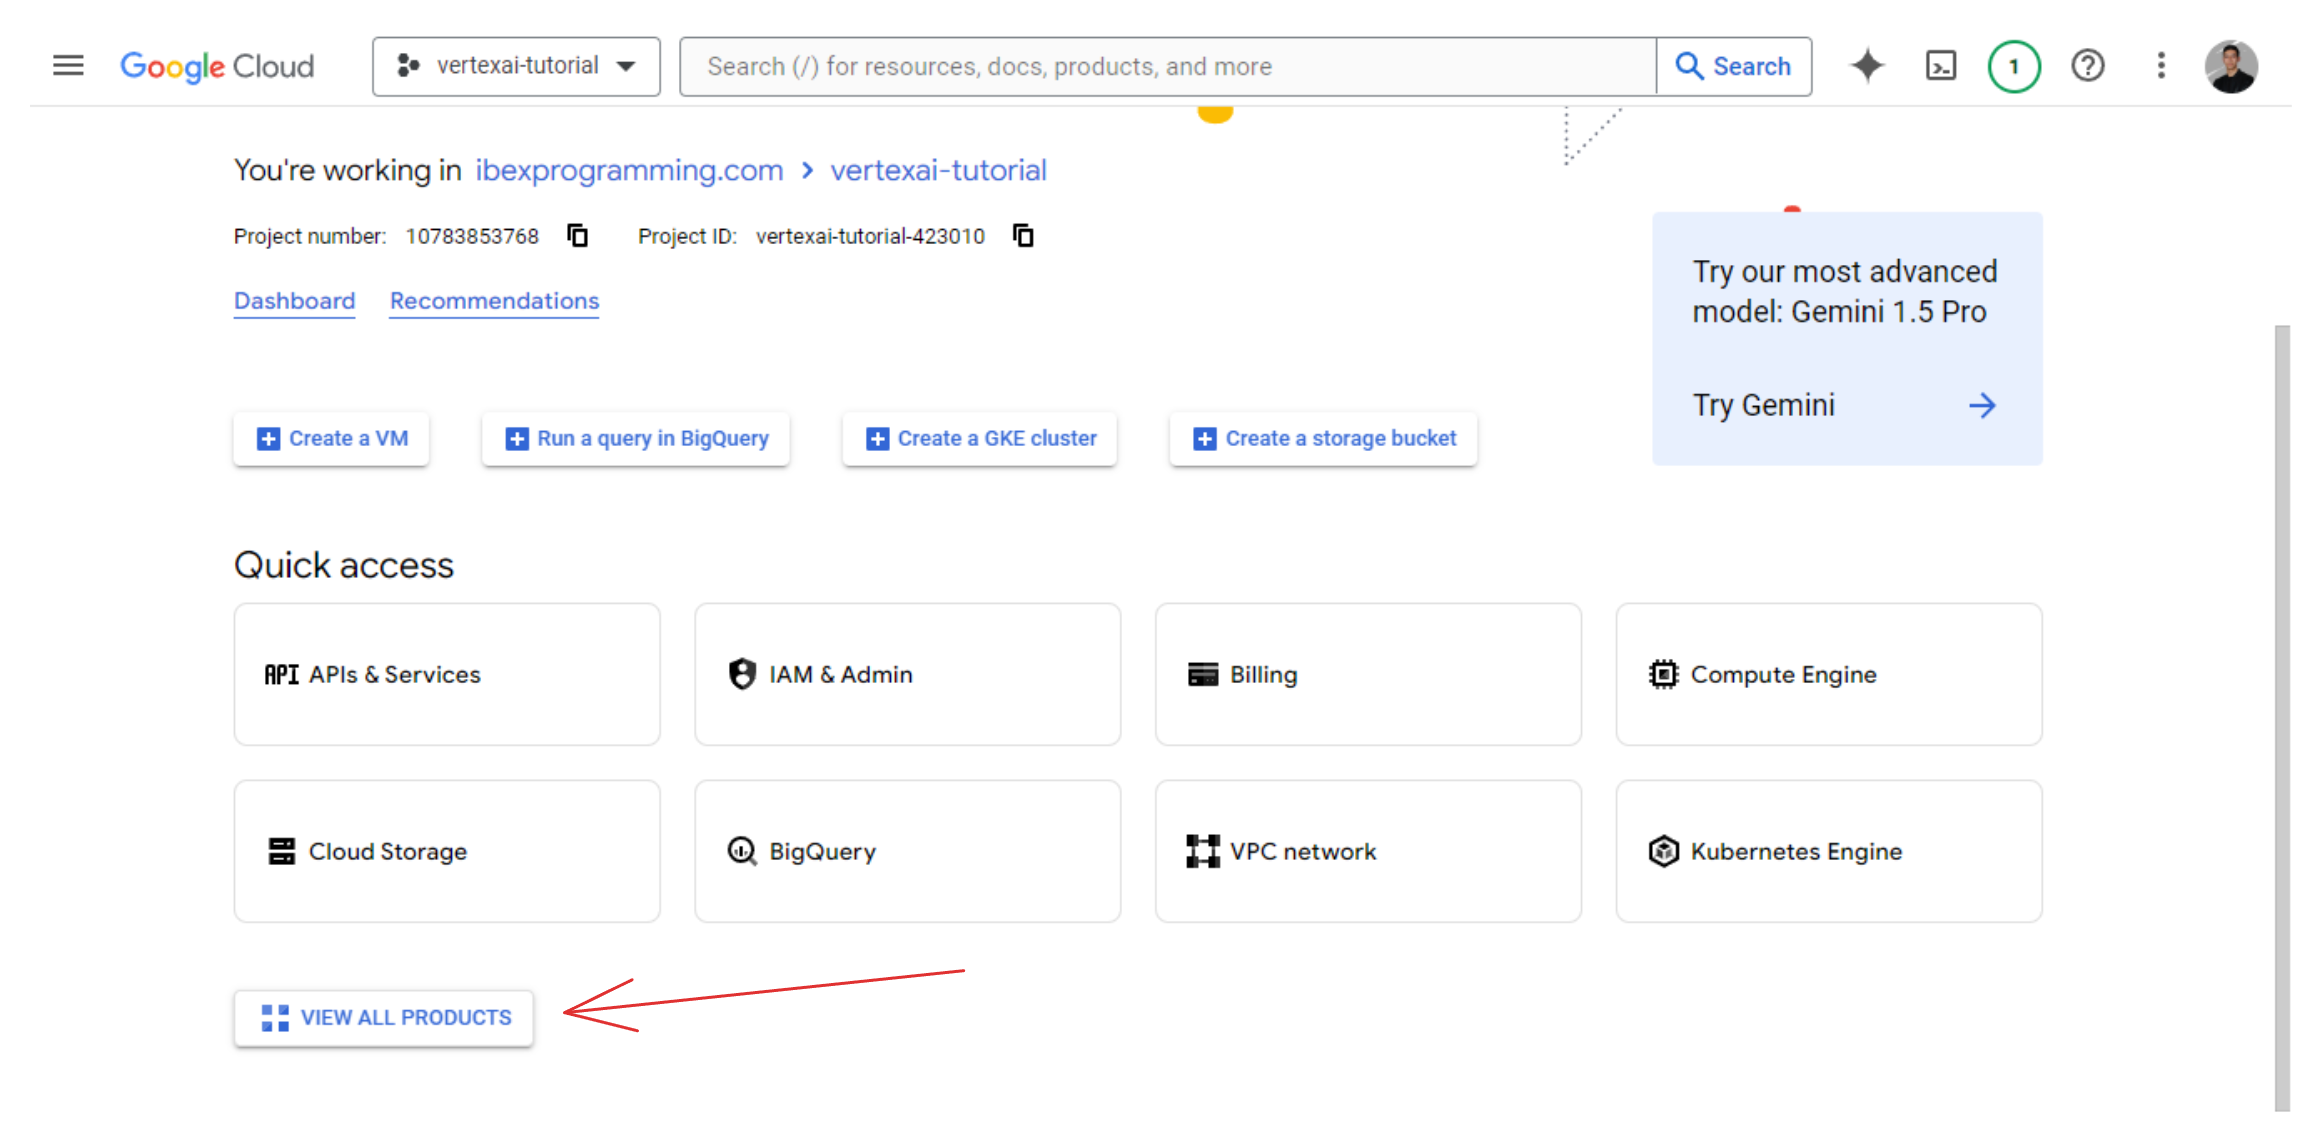

The next page will list all the services offered by Google Cloud for your project. Search for "Vertex AI" (Ctrl + F) and pin it to your menu for easy access. Then, click on the service itself:

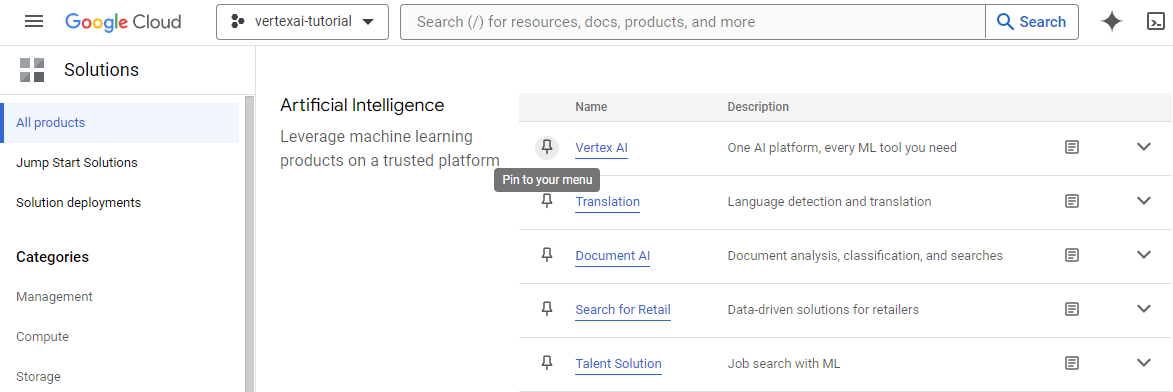

This will direct you to your Vertex AI dashboard located at https://console.cloud.google.com/vertex-ai. A window amy pop up asking you to enable Vertex AI API - choose "Enable". If the window doesn't pop up you can click on "Enable all API permissions" button to do the same.

Now, we are ready to upload a dataset to Vertex AI.

## Uploading a dataset in Vertex AI

There are a variety of ways of uploading a dataset to Vertex AI. In this section, we will use local CSV uploading for simplicity.  

### Download a sample dataset

For the article, we will be using the [Dry Bean dataset](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset) from the UCI Machine Learning repository. It contains 13k instances of beans and their 16 numeric measurements. The task is to classify them into seven types of beans: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira.

Save the Excel file inside the downloaded ZIP to your local directory:

In [2]:
from pathlib import Path

cwd = Path.cwd()
data_path = cwd / "data" / "Dry_Bean_Dataset.xlsx"

Then, we can read this file with Pandas and save it back as a CSV:

In [5]:
import pandas as pd

beans = pd.read_excel(data_path)

beans.shape

(13611, 17)

> Note that `read_excel` function requires you to install the `openpyxl` library with PIP.

Great, we have the dataset as a DataFrame. Let's save it back as a CSV:

In [7]:
beans.to_csv(cwd / "data" / "dry_bean.csv", index=False)

### Enable billing

### Possibly - create a cloud storage bucket

### Ingest a local CSV into Vertex AI

### Possible - ingest a dataset from big query to Vertex AI

## Training and deploying AutoML models in Vertex AI

## Training and deploying custom models in Vertex AI

## Conclusion